# Logistic Regression test of NBA stats 🏀

### Aim: Given a set of game data, predict whether the data belongs to (Jordan/Kobe/Lebron)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data preparation

In [2]:
total = pd.read_csv('nba/allgames_stats.csv')

# preprocessing
total.fillna(value=0, inplace=True)
total.loc[:, 'True'] = 0

# whom to predict
total.loc[total['Player'] == 'Kobe Bryant', 'True'] = 1

# feature selection
features = ['FG', 'FGA', '3P', '3PA', 'FTA', 'TRB', 'AST', 'PTS', 'True']
data = total.loc[:, features]

In [3]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FG      4254 non-null   float64
 1   FGA     4254 non-null   float64
 2   3P      4254 non-null   int64  
 3   3PA     4254 non-null   int64  
 4   FTA     4254 non-null   float64
 5   TRB     4254 non-null   int64  
 6   AST     4254 non-null   int64  
 7   PTS     4254 non-null   float64
 8   True    4254 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 299.2 KB


,FG,FGA,3P,3PA,FTA,TRB,AST,PTS,True
0,0.0,1.0,0,0,0.0,1,0,0.0,1
1,0.0,1.0,0,0,2.0,0,0,1.0,1
2,2.0,3.0,1,2,0.0,0,0,5.0,1
3,3.0,8.0,2,3,4.0,3,0,10.0,1
4,0.0,3.0,0,0,2.0,3,1,2.0,1


### Model training and testing

In [17]:
def build(data, C=1, penalty='l2', solver='liblinear'):
    X = data.iloc[:, :-1]
    Y = data['True']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    lr = LogisticRegression(C=C, penalty=penalty, max_iter=3000, solver=solver)
    lr.fit(X_train, Y_train)
    
    prob = lr.predict(X_test)
    pred = np.where(prob >= 0.5, 1, 0)

    cm = sklearn.metrics.confusion_matrix(Y_test, pred, labels=[0, 1])

    accuracy = cm.diagonal().sum()/cm.sum()
#     print('Accuracy:', accuracy, "when C:", round(1/C, 2))
    return lr.coef_

In [5]:
test = build(data)

Accuracy: 0.7379553466509988 when C: 1.0


In [6]:
test

array([[-0.46859166,  0.02841924, -0.18561459,  0.23781667, -0.1288775 ,
        -0.1685325 , -0.16220692,  0.14694869]])

### Research how coef changes with different regularization

In [7]:
def normalization(data):
    data = abs(data)
    ran = np.max(data) - np.min(data)
    return (data - np.min(data)) / ran

#### Log space

In [43]:
coef1 = []
for c in np.logspace(0, -3):
    rv = build(data, c, 'l1', 'liblinear')
    coef1.append(rv[0].tolist())

coef1 = pd.DataFrame(coef1)

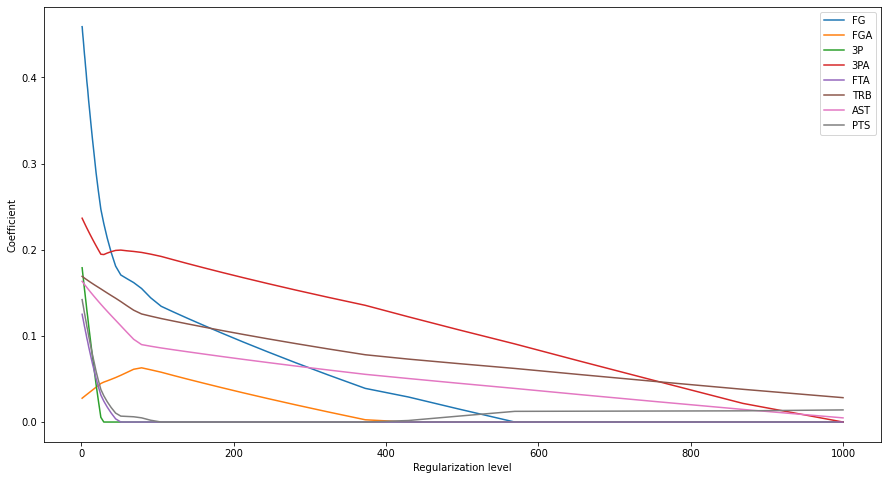

In [44]:
x = np.logspace(0, 3)

plt.figure(figsize=(15, 8))
for i in range(coef1.shape[1]):
    plt.plot(x, abs(coef1[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()

### For L1 regularization, only {'liblinear'} could be chosen.

In [39]:
coef1 = []
for c in range(1000, 1, -10):
    rv = build(data, c/1000, 'l1', 'liblinear')
    coef1.append(rv[0].tolist())

coef1 = pd.DataFrame(coef1)

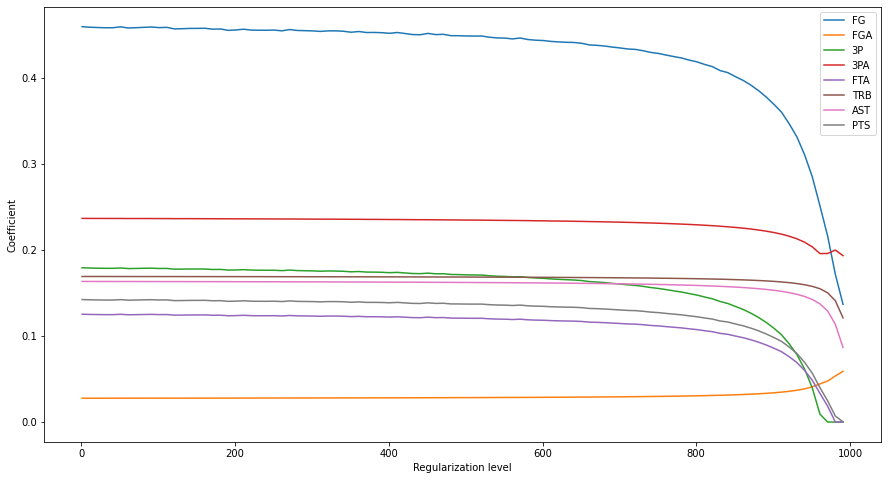

In [40]:
x = np.arange(1, 1000, 10)

plt.figure(figsize=(15, 8))
for i in range(coef1.shape[1]):
    plt.plot(x, abs(coef1[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()

### For L2 regularization, 4 solver ('newton-cg', 'lbfgs', 'liblinear', 'sag') could be chosen. 

Accuracy: 0.7379553466509988 when C: 1.0
Accuracy: 0.7379553466509988 when C: 1.02
Accuracy: 0.7379553466509988 when C: 1.04
Accuracy: 0.7379553466509988 when C: 1.06
Accuracy: 0.7379553466509988 when C: 1.09
Accuracy: 0.7379553466509988 when C: 1.11
Accuracy: 0.7379553466509988 when C: 1.14
Accuracy: 0.7379553466509988 when C: 1.16
Accuracy: 0.7379553466509988 when C: 1.19
Accuracy: 0.7379553466509988 when C: 1.22
Accuracy: 0.7379553466509988 when C: 1.25
Accuracy: 0.736780258519389 when C: 1.28
Accuracy: 0.736780258519389 when C: 1.32
Accuracy: 0.736780258519389 when C: 1.35
Accuracy: 0.736780258519389 when C: 1.39
Accuracy: 0.736780258519389 when C: 1.43
Accuracy: 0.736780258519389 when C: 1.47
Accuracy: 0.736780258519389 when C: 1.52
Accuracy: 0.736780258519389 when C: 1.56
Accuracy: 0.736780258519389 when C: 1.61
Accuracy: 0.736780258519389 when C: 1.67
Accuracy: 0.736780258519389 when C: 1.72
Accuracy: 0.736780258519389 when C: 1.79
Accuracy: 0.736780258519389 when C: 1.85
Accura

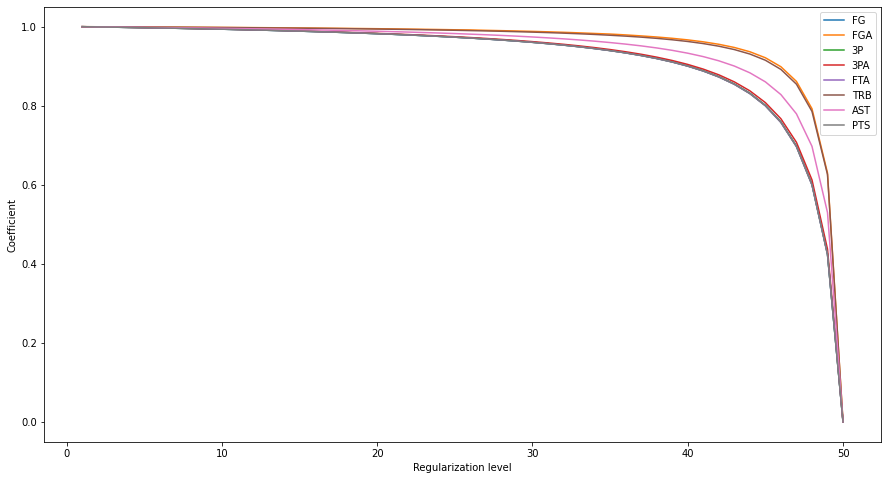

In [12]:
# Solver = 'newton-cg'
coef2 = []
for c in range(100, 1, -2):
    rv = build(data, c/100, 'l2', solver='newton-cg')
    coef2.append(rv[0].tolist())

coef2 = pd.DataFrame(coef2)

plt.figure(figsize=(15, 8))
for i in range(coef2.shape[1]):
    plt.plot(x, normalization(coef2[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()

Accuracy: 0.7379553466509988 when C: 1.0
Accuracy: 0.7379553466509988 when C: 1.02
Accuracy: 0.7379553466509988 when C: 1.04
Accuracy: 0.7379553466509988 when C: 1.06
Accuracy: 0.7379553466509988 when C: 1.09
Accuracy: 0.7379553466509988 when C: 1.11
Accuracy: 0.7379553466509988 when C: 1.14
Accuracy: 0.7379553466509988 when C: 1.16
Accuracy: 0.7379553466509988 when C: 1.19
Accuracy: 0.7379553466509988 when C: 1.22
Accuracy: 0.736780258519389 when C: 1.25
Accuracy: 0.736780258519389 when C: 1.28
Accuracy: 0.736780258519389 when C: 1.32
Accuracy: 0.7379553466509988 when C: 1.35
Accuracy: 0.736780258519389 when C: 1.39
Accuracy: 0.736780258519389 when C: 1.43
Accuracy: 0.736780258519389 when C: 1.47
Accuracy: 0.736780258519389 when C: 1.52
Accuracy: 0.736780258519389 when C: 1.56
Accuracy: 0.736780258519389 when C: 1.61
Accuracy: 0.736780258519389 when C: 1.67
Accuracy: 0.736780258519389 when C: 1.72
Accuracy: 0.736780258519389 when C: 1.79
Accuracy: 0.736780258519389 when C: 1.85
Accura

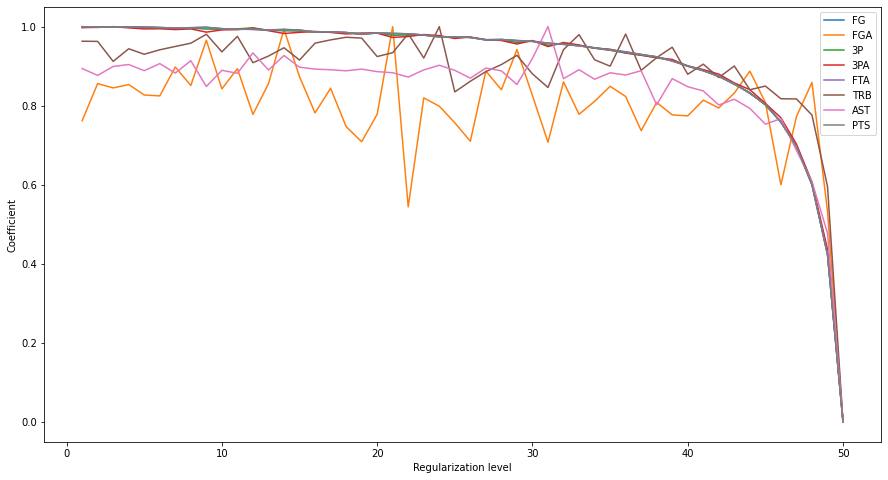

In [13]:
# Solver = 'lbfgs'
coef3 = []
for c in range(100, 1, -2):
    rv = build(data, c/100, 'l2', solver='lbfgs')
    coef3.append(rv[0].tolist())

coef3 = pd.DataFrame(coef3)

plt.figure(figsize=(15, 8))
for i in range(coef3.shape[1]):
    plt.plot(x, normalization(coef3[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()

Accuracy: 0.7379553466509988 when C: 1.0
Accuracy: 0.7379553466509988 when C: 1.02
Accuracy: 0.7379553466509988 when C: 1.04
Accuracy: 0.7379553466509988 when C: 1.06
Accuracy: 0.7379553466509988 when C: 1.09
Accuracy: 0.7379553466509988 when C: 1.11
Accuracy: 0.7379553466509988 when C: 1.14
Accuracy: 0.7379553466509988 when C: 1.16
Accuracy: 0.7379553466509988 when C: 1.19
Accuracy: 0.7379553466509988 when C: 1.22
Accuracy: 0.7379553466509988 when C: 1.25
Accuracy: 0.7379553466509988 when C: 1.28
Accuracy: 0.7379553466509988 when C: 1.32
Accuracy: 0.7379553466509988 when C: 1.35
Accuracy: 0.7379553466509988 when C: 1.39
Accuracy: 0.7379553466509988 when C: 1.43
Accuracy: 0.7379553466509988 when C: 1.47
Accuracy: 0.7379553466509988 when C: 1.52
Accuracy: 0.7379553466509988 when C: 1.56
Accuracy: 0.7379553466509988 when C: 1.61
Accuracy: 0.7379553466509988 when C: 1.67
Accuracy: 0.7379553466509988 when C: 1.72
Accuracy: 0.7379553466509988 when C: 1.79
Accuracy: 0.7379553466509988 when C

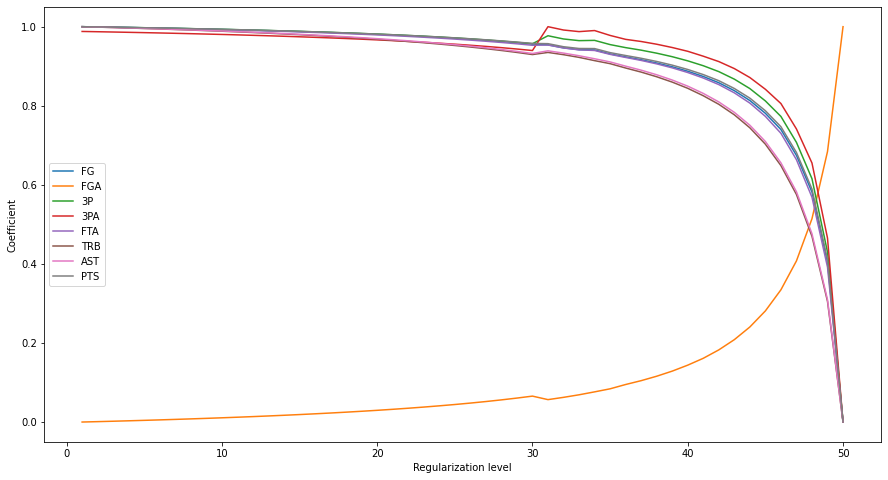

In [14]:
# Solver = 'liblinear'
coef4 = []
for c in range(100, 1, -2):
    rv = build(data, c/100, 'l2', solver='liblinear')
    coef4.append(rv[0].tolist())

coef4 = pd.DataFrame(coef4)

plt.figure(figsize=(15, 8))
for i in range(coef4.shape[1]):
    plt.plot(x, normalization(coef4[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()

Accuracy: 0.7379553466509988 when C: 1.0
Accuracy: 0.7379553466509988 when C: 1.02
Accuracy: 0.7379553466509988 when C: 1.04
Accuracy: 0.7379553466509988 when C: 1.06
Accuracy: 0.7379553466509988 when C: 1.09
Accuracy: 0.7379553466509988 when C: 1.11
Accuracy: 0.7379553466509988 when C: 1.14
Accuracy: 0.7379553466509988 when C: 1.16
Accuracy: 0.7379553466509988 when C: 1.19
Accuracy: 0.7379553466509988 when C: 1.22
Accuracy: 0.7379553466509988 when C: 1.25
Accuracy: 0.7379553466509988 when C: 1.28
Accuracy: 0.7379553466509988 when C: 1.32
Accuracy: 0.7379553466509988 when C: 1.35
Accuracy: 0.7379553466509988 when C: 1.39
Accuracy: 0.7379553466509988 when C: 1.43
Accuracy: 0.7379553466509988 when C: 1.47
Accuracy: 0.7379553466509988 when C: 1.52
Accuracy: 0.7379553466509988 when C: 1.56
Accuracy: 0.7379553466509988 when C: 1.61
Accuracy: 0.7379553466509988 when C: 1.67
Accuracy: 0.7379553466509988 when C: 1.72
Accuracy: 0.7379553466509988 when C: 1.79
Accuracy: 0.7379553466509988 when C

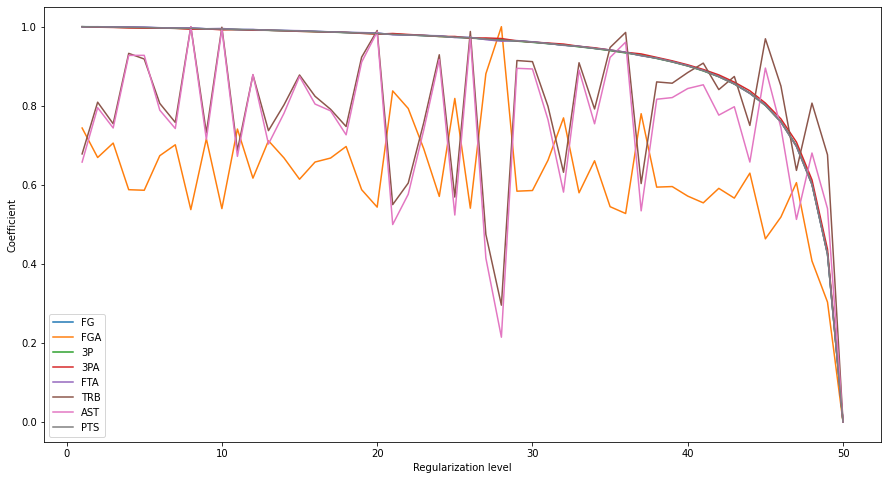

In [15]:
# Solver = 'sag' (very large dataset)
coef5 = []
for c in range(100, 1, -2):
    rv = build(data, c/100, 'l2', solver='sag')
    coef5.append(rv[0].tolist())

coef5 = pd.DataFrame(coef5)

plt.figure(figsize=(15, 8))
for i in range(coef5.shape[1]):
    plt.plot(x, normalization(coef5[i]), label=features[i])

plt.legend()
plt.xlabel('Regularization level')
plt.ylabel('Coefficient')
plt.show()